In [4]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute,QuantumRegister, ClassicalRegister
import qiskit
import numpy as np
import math as m
from qiskit.circuit.library import QFT
from qiskit.providers.aer import QasmSimulator

In [5]:
def set_input_state(a,b):
 
    n=round(m.log2(a+b)+1)    
 
        
    get_binary= lambda x: '{0:{fill}{n}b}'.format(x, fill='0',n=n)
    
    #create a quantum circuit
    r_a=QuantumRegister(n,'a')
    r_b=QuantumRegister(n,'b')
    cr=ClassicalRegister(n,'c')
    qc=QuantumCircuit(r_a,r_b,cr)
    
    a=get_binary(a)
    b=get_binary(b)
    
    for i  in range(n):
        if (a[i]=='1'):
            qc.x(r_a[n-1-i])
        if (b[i]=='1'):
            qc.x(r_b[n-1-i])
            
    return qc, r_a , r_b , cr, n

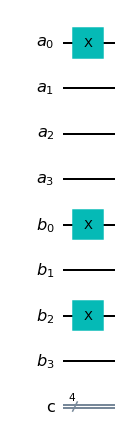

In [6]:
#test function set_input_state
qc, r_a , r_b , cr,n= set_input_state(1,5)
qc.draw("mpl")

In [8]:
a=1
b=3
qc, r_a , r_b , cr,n= set_input_state(a,b)
qc.append(QFT(n, do_swaps=False),[i for i in range(n)])
for i in range(n):
    for j in range(i+1):  
        qc.cu1(np.pi/2**(i-j),r_b[j],r_a[i])
    
qc.append(QFT(n, do_swaps=False).inverse(),[i for i in range(n)])


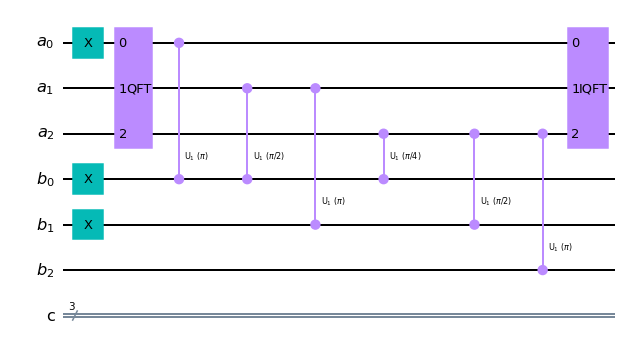

In [9]:
qc.draw("mpl")

In [10]:
backend= Aer.get_backend("qasm_simulator")
qc.measure(r_a,cr)
result= execute(qc,backend, shots=100).result()

In [11]:
counts=result.get_counts(qc)
print(counts)

{'100': 100}
